## Stock Analysis 

Story of how Gautam Adani lost $9 billion in 3 days in the worst wealth rout

### Price Analysis - Part 2

As a novice investor, one of the first industries that caught my eye was the Power Industry. The Power Industry in India is plagued with debts, high-interest rates, and enormous setup costs.  Due to this the threat of new entrants in this industry is low. Most companies operate monopolies in their underlying territories. There is 'future' promise in this industry - with the outreach of power facilities to Tier-3 and the rural areas of India only increasing.



In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Stock in Focus - Adani Power

#### 'Adani Power Limited is committed to ensuring the nation's energy security with thermal and solar power plants across India.' - https://www.adanipower.com/

Adani Power has been in the news for the last dozen weeks. A security whose price has gone up purely based on speculation and hype - finally was called out upon. In this notebook, I have analyzed some of the key metrics and timelines that reflect the audacious rise of this security. 

I have retrieved 'daily' level data from https://www1.nseindia.com/products/content/equities/equities/eq_security.htm

You can also get data at a granular level with APIs provided by Zerodha and a few others - although they come at a price.

In [380]:
df = pd.read_csv('Adani_Power.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ADANIPOWER,EQ,22-Jun-2020,38.00,38.55,38.60,35.95,38.05,38.20,37.57,28617224,1.075089e+09,43259,7432760,25.97
1,ADANIPOWER,EQ,23-Jun-2020,38.20,38.00,38.40,37.20,37.80,37.90,37.82,11481054,4.342569e+08,21055,2442168,40.26
2,ADANIPOWER,EQ,24-Jun-2020,37.90,38.30,39.10,37.00,37.30,37.75,38.52,20525135,7.906976e+08,37321,5911773,28.80
3,ADANIPOWER,EQ,25-Jun-2020,37.75,37.85,38.25,36.50,37.20,36.75,37.28,15974452,5.955356e+08,23885,8328106,52.13
4,ADANIPOWER,EQ,26-Jun-2020,36.75,37.80,37.90,36.40,36.80,36.75,37.20,5533269,2.058479e+08,11491,2260946,40.86


### Time Frame - Level of Analysis

The time frame that you use to study charts depends on the type of inverstor you are. If you are a short-term trader, you should be using daily charts for trading. If your trading period is longer than one year, you are better off using weekly charts, which help study the market from a longer-range perspective.

We will be doing the analysis on a 'daily' level.

In [381]:
df.shape

(250, 15)

In [382]:
print('Start of series:', df['Date'].iloc[0:1:], '\nEnd of series:', df['Date'].iloc[len(df)-1::])

Start of series: 0    22-Jun-2020
Name: Date, dtype: object 
End of series: 249    18-Jun-2021
Name: Date, dtype: object


In [383]:
df = df[['Date', 'High Price','Low Price','Prev Close','Close Price','Deliverable Qty']]

df.columns = ['Date','High','Low','PClose','Close','Volume']
df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index(df['Date'])
df.head()

,Date,High,Low,PClose,Close,Volume
0,2020-06-22,38.60,35.95,38.00,38.20,7432760
1,2020-06-23,38.40,37.20,38.20,37.90,2442168
2,2020-06-24,39.10,37.00,37.90,37.75,5911773
3,2020-06-25,38.25,36.50,37.75,36.75,8328106
4,2020-06-26,37.90,36.40,36.75,36.75,2260946


### 52W high and 52W low

This is one of the indicators which can be used to assess the current performance of the stock with respect to its previous high and low. The 52-week high/low is the highest and lowest price at which a security has traded during the time period that equates to one year and is viewed as a technical indicator. The 52-week high/low is based on the daily closing price for the given stock.



### 52W high

In [384]:
df[df['High'] == max(df['High'])]

,Date,High,Low,PClose,Close,Volume
242,2021-06-09,166.9,138.5,151.75,152.35,43368176


### 52W low

In [385]:
#min(df_1['Low'])
df[df['Low'] == min(df['Low'])]

,Date,High,Low,PClose,Close,Volume
16,2020-07-14,36.15,34.35,34.7,35.7,2443240


### Price Analysis - On the close price on a given day

In [386]:
df['Close'].describe().round()

count    250.0
mean      58.0
std       28.0
min       35.0
25%       37.0
50%       48.0
75%       85.0
max      154.0
Name: Close, dtype: float64

### Let's compare Adani Power with the Nifty 50 index
- 'The NIFTY 50 covers major sectors of the Indian economy and offers investment managers exposure to the Indian market in one efficient portfolio.'
- Usually the market sentiment is determined using various indicies like the Nifty 50
- Nifty 50, Nifty 500, Bank Nifty

In [387]:
nifty = pd.read_csv('NIFTY50.csv')
nifty['Date'] = pd.to_datetime(nifty['Date'])
nifty.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
246,2021-06-14,15791.40,15823.05,15606.50,15811.85,392862037,28001.50
247,2021-06-15,15866.95,15901.60,15842.40,15869.25,323262818,22181.26
248,2021-06-16,15847.50,15880.85,15742.60,15767.55,340191175,22505.95
249,2021-06-17,15648.30,15769.35,15616.75,15691.40,357649243,26048.47
250,2021-06-18,15756.50,15761.50,15450.90,15683.35,640821642,42024.55


In [388]:
data = pd.merge(nifty[['Date','Close']], df[['Date', 'Close']], on = ['Date'])
data.columns = ['Date', 'Nifty', 'Adani Power']

### On an overall level, the price change doesn't look drastic

- NIFTY was in a bloodbath following the days of March, 2020 (Covid-19)
- NIFTY saw a strong recovery from those worrying recent lows
- Adani Power had a quite FH21. We start to see some movement from January FY21, which we will observe further

<AxesSubplot:>

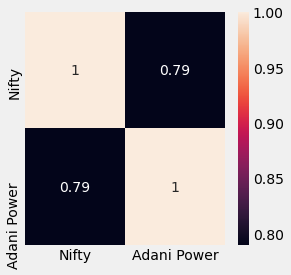

In [444]:
fig, ax = plt.subplots(figsize=(4,4))         
sns.heatmap(data.corr(),  annot = True)

The correlation between Adani Power and Nifty looks healthy and doesn't look worrying on an overall level

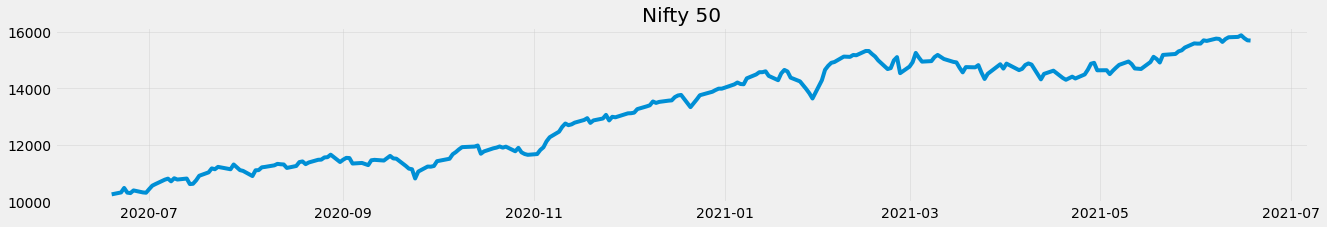

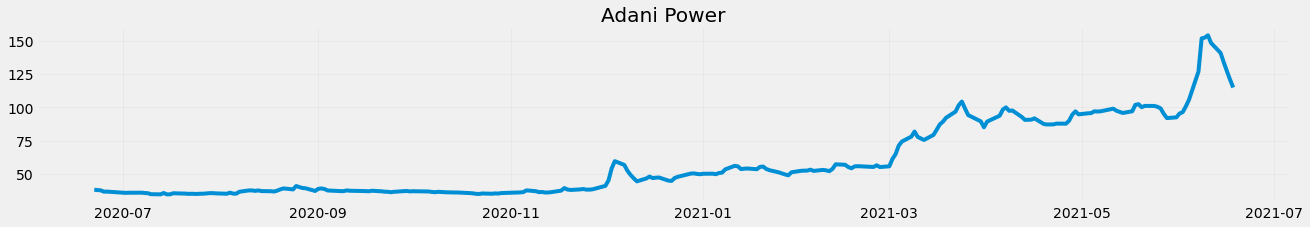

In [485]:
fig,ax = plt.subplots(figsize = (20,3))
plt.title('Nifty 50')
plt.plot( nifty['Date'][::], nifty['Close'][::])
plt.grid(alpha = 0.4)
fig,ax = plt.subplots(figsize = (20,3))
plt.title('Adani Power')
plt.plot( df['Date'][::], df['Close'][::])
plt.grid(alpha = 0.2)

## Although....
### Comparing trend of Adani Power with Nifty for FY21 March

<ipython-input-521-584b493b2745>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_march_FY21 = data[data['Date']>'2021-03-01'][data['Date']<'2021-04-01']


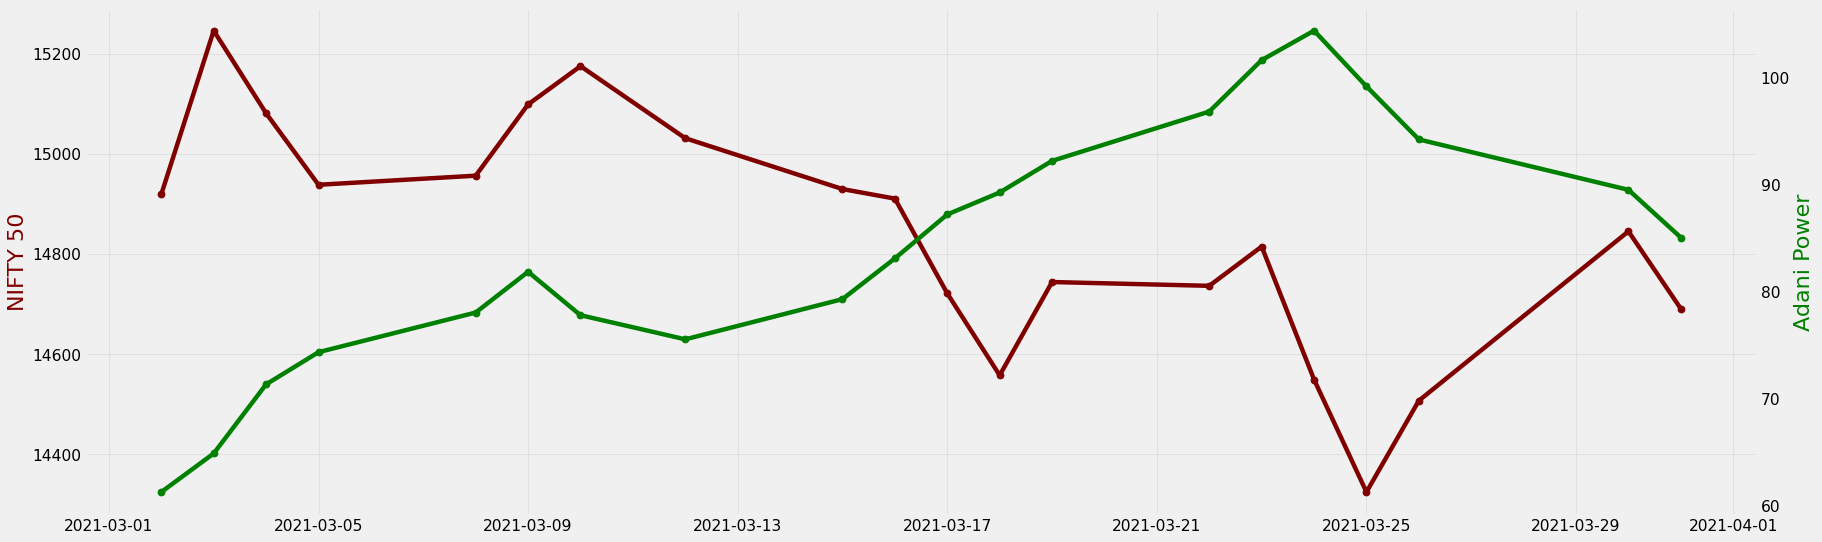

In [521]:
data_march_FY21 = data[data['Date']>'2021-03-01'][data['Date']<'2021-04-01']

fig,ax = plt.subplots(figsize = (23,7), dpi=80)
ax.plot(data_march_FY21[::].Date, data_march_FY21[::].Nifty, color="maroon", marker="o")
ax.set_ylabel("NIFTY 50",color="maroon",fontsize=20)
ax.grid(alpha=.4)

ax2=ax.twinx()
ax2.plot(data_march_FY21[::].Date, data_march_FY21[::]["Adani Power"],color="green",marker="o")
ax2.set_ylabel("Adani Power",color="green",fontsize=20)

fig.tight_layout()
plt.grid()
plt.show()

### We see a high negative correlation between the two in March FY21

<AxesSubplot:>

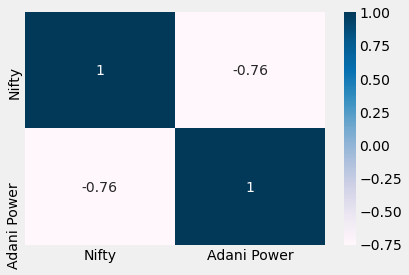

In [445]:
sns.heatmap(data_march_FY21.corr(), cmap='PuBu', annot = True)

### Where things don't start to make much sense

 Let's go over the fundamentals of Adani Power before we start looking at some of the recent price trends. Stocks belonging to the Adani Group across different sectors have seen mysterious rallies in price in the past, accounting for the high P/E ratios. Adani Power was the only stock belonging to this group that had not seen this trend. But in early March 2021, you guessed it, the price of Adani Power too started increasing monumentally. 

A company which hasn't made profit since 2012, starts to see Upper Circuit after Upper Circuit in price. Retail investors start to buy the shares based purely on hype and speculation. 

You can observe how sparse the distibution is from the start of 2021-03 (March)

<AxesSubplot:xlabel='Date', ylabel='Close'>

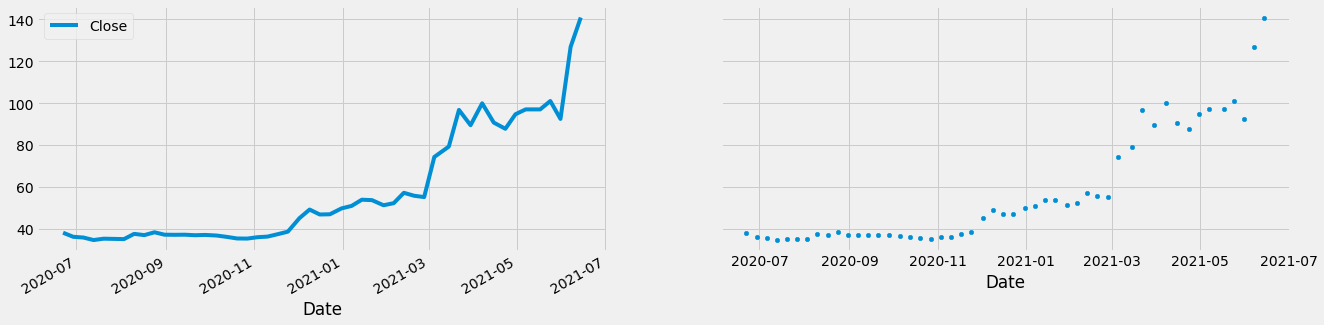

In [498]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
df[::5].plot(x='Date', y='Close', figsize=(20,5),ax = ax) 
df[::5].plot.scatter(x='Date', y='Close', figsize=(20,5), ax = ax2)

Let's try to get the numbers behind these changes in price from March, 2021

In [394]:
df['Change'] = (df['Close'].diff())
df['Abs_Change'] = abs(df['Change'])
df.fillna(value = 0, inplace = True)
df['%_change'] = np.where(df['Abs_Change']!=0, (df['Change']*100/(df['Close']-df['Change'])).round(2), 0)

#### The number of times this share has hit an Upper Circuit in price is just staggering 
- a point to note -  NIFTY was down for the whole of March 2021, and only started to recover in April 2021
- Other stocks in the industry didn't see much movement in March/April 2021
- Adani Power quickly started gaining the eye of the public

In [395]:
df['%change_abs'] = abs(df['%_change'])
df[df['Date']>'2021-03-01'][df['%change_abs']>4.7][['Date', 'Close', 'Change', '%_change']].sort_values(by='%_change', ascending = False)

<ipython-input-395-169a154f19a3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Date']>'2021-03-01'][df['%change_abs']>4.7][['Date', 'Close', 'Change', '%_change']].sort_values(by='%_change', ascending = False)


,Date,Close,Change,%_change
240,2021-06-07,126.90,21.15,20.00
241,2021-06-08,151.75,24.85,19.58
177,2021-03-02,61.30,5.55,9.96
179,2021-03-04,71.35,6.45,9.94
178,2021-03-03,64.90,3.60,5.87
213,2021-04-28,94.50,4.50,5.00
197,2021-04-01,89.30,4.25,5.00
226,2021-05-18,101.90,4.85,5.00
190,2021-03-22,96.80,4.60,4.99
181,2021-03-08,78.05,3.70,4.98


### 29 TIMES!
#### The number of times Adani Power was either on the upper or lower circuit in the span of just 3 months

In [396]:
len(df[df['Date']>'2021-03-01'][df['%change_abs']>4.7][['Date', 'Close', 'Change', '%_change']].sort_values(by='%_change', ascending = False))

<ipython-input-396-6900e28a48f9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Date']>'2021-03-01'][df['%change_abs']>4.7][['Date', 'Close', 'Change', '%_change']].sort_values(by='%_change', ascending = False))


29

### The final nail in the coffin - June 2021

In the last week (13th June 2021 - 18th June 2021) , Adani Power has seen 5 Lower Circuits in a row. A heavy correction is taking place, after Adani Group of companies was speculated to have foreign investors manipulating the price of the stock. 

In [464]:
df[df['Date']>'2021-06-10'][['Date', 'Close', '%_change']]

,Date,Close,%_change
244,2021-06-11,148.30,-3.76
245,2021-06-14,140.90,-4.99
246,2021-06-15,133.90,-4.97
247,2021-06-16,127.25,-4.97
248,2021-06-17,120.90,-4.99
249,2021-06-18,114.90,-4.96


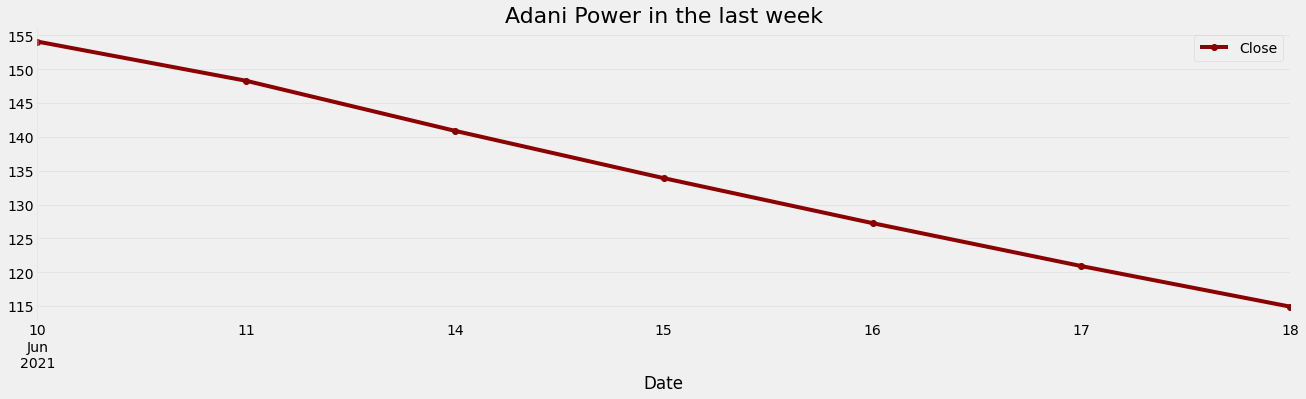

In [505]:
df[df['Date']>'2021-06-09'][::1].plot(x='Date', y='Close', figsize=(20,5),color="darkred",marker="o")
plt.title("Adani Power in the last week", fontsize=22)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)  
plt.grid(axis='both', alpha=.3)
plt.show()

Check this article out for a closer look of what was happening :
https://economictimes.indiatimes.com/markets/stocks/news/gautam-adani-needs-investors-who-have-a-website-at-least/articleshow/83593197.cms

Sucheta Dalal on twitter : https://twitter.com/suchetadalal/status/1403576980742627333 
##### 'Another scandal hard to prove outside the black box of information available with SEBI tracking systems is the return of an operator of the past who is relentlessly rigging prices of one group. All through foreign entities! His speciality & that of a former FM. Nothing changes!'
